### 1 - Import the Pandas, Numpy, Seaborn, Matplotlib, and Ydata profiling libraries.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

/home/thomas/Development/Git/intro-to-data-science/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2 - Import the data from a CSV file containing information about Marvel movies, available at: https://www.kaggle.com/rachit239/mcu-complete-dataset.

In [75]:
import kaggle
import pandas as pd
import os

kaggle.api.authenticate()
dataset_slug = 'rachit239/mcu-complete-dataset'
download_path = 'mcu_dataset'
csv_file_name = 'mcu dataset.csv'
file_path = os.path.join(download_path, csv_file_name)

os.makedirs(download_path, exist_ok=True)
kaggle.api.dataset_download_files(dataset_slug, path=download_path, unzip=True)

df = pd.read_csv(file_path)
df.head(5)

Dataset URL: https://www.kaggle.com/datasets/rachit239/mcu-complete-dataset


,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1


In [78]:

from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="MCU Dataset Profiling Report")
profile.to_file("mcu_profiling_report.html")

# Função para converter valores monetários para numérico
def convert_currency_to_numeric(dataframe, columns):
    """
    Converte colunas com valores monetários (formato $X,XXX,XXX) para numérico.

    Parameters:
    -----------
    dataframe : pd.DataFrame
        DataFrame contendo as colunas a serem convertidas
    columns : list
        Lista com os nomes das colunas a converter

    Returns:
    --------
    pd.DataFrame
        DataFrame com as novas colunas numéricas (sufixo '_numeric')
    """
    df_copy = dataframe.copy()

    for col in columns:
        if col in df_copy.columns:
            # Remove $ e vírgulas, converte para numérico
            new_col_name = f"{col}_numeric"
            df_copy[new_col_name] = (df_copy[col]
                                     .astype(str)
                                     .str.replace('$', '', regex=False)
                                     .str.replace(',', '', regex=False))
            df_copy[new_col_name] = pd.to_numeric(df_copy[new_col_name], errors='coerce')
            print(f"✓ Coluna '{col}' convertida para '{new_col_name}'")
        else:
            print(f"⚠ Coluna '{col}' não encontrada no DataFrame")

    return df_copy

# Lista de colunas monetárias para converter
monetary_columns = ['Budget', 'Domestic Gross', 'Total Gross', 'Opening Gross']

# Aplicar a conversão
df = convert_currency_to_numeric(df, monetary_columns)

# Verificar os tipos de dados das novas colunas
print("\n--- Novas colunas numéricas ---")
numeric_cols = [col for col in df.columns if col.endswith('_numeric')]
print(df[numeric_cols].dtypes)

# Find the most frequent budget value
budget_value_counts = df['Budget'].value_counts()
most_frequent_budget = budget_value_counts.index[0]
most_frequent_count = budget_value_counts.iloc[0]
percentage = (most_frequent_count / len(df)) * 100

print(f"\nMost frequent budget value: {most_frequent_budget}")
print(f"Occurrences: {most_frequent_count}")
print(f"Percentage: {percentage:.2f}%")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 271.49it/s]

✓ Coluna 'Budget' convertida para 'Budget_numeric'
✓ Coluna 'Domestic Gross' convertida para 'Domestic Gross_numeric'
✓ Coluna 'Total Gross' convertida para 'Total Gross_numeric'
✓ Coluna 'Opening Gross' convertida para 'Opening Gross_numeric'

--- Novas colunas numéricas ---
Budget_numeric            int64
Domestic Gross_numeric    int64
Total Gross_numeric       int64
Opening Gross_numeric     int64
dtype: object

Most frequent budget value: $200,000,000
Occurrences: 4
Percentage: 17.39%


In [79]:
print(df.dtypes)
df.columns

Name                       object
US release Date            object
Director                   object
Producer                   object
Duration                   object
Genre                      object
IMDB rating               float64
metascore                   int64
Cast                       object
Budget                     object
Domestic Gross             object
Total Gross                object
Opening Gross              object
Oscar Nomination            int64
Oscar won                   int64
Phase                       int64
Budget_numeric              int64
Domestic Gross_numeric      int64
Total Gross_numeric         int64
Opening Gross_numeric       int64
dtype: object


Index(['Name', 'US release Date', 'Director', 'Producer', 'Duration', 'Genre',
       'IMDB rating', 'metascore', 'Cast', 'Budget', 'Domestic Gross',
       'Total Gross', 'Opening Gross', 'Oscar Nomination', 'Oscar won',
       'Phase', 'Budget_numeric', 'Domestic Gross_numeric',
       'Total Gross_numeric', 'Opening Gross_numeric'],
      dtype='object')

### 3 - Using the ydata_profiling or Sweetviz library, find the most frequent budget value in the Marvel movies dataset and state the percentage of times this budget was used.

In [80]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="MCU Dataset Profiling Report")
profile.to_file("mcu_profiling_report.html")

# Convert Budget to numeric values (remove $ and commas)
# First ensure the column is string type, then clean and convert
df['Budget_numeric'] = df['Budget'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Budget_numeric'] = pd.to_numeric(df['Budget_numeric'], errors='coerce')

# Find the most frequent budget value
budget_value_counts = df['Budget'].value_counts()
most_frequent_budget = budget_value_counts.index[0]
most_frequent_count = budget_value_counts.iloc[0]
percentage = (most_frequent_count / len(df)) * 100

print(f"Most frequent budget value: {most_frequent_budget}")
print(f"Occurrences: {most_frequent_count}")
print(f"Percentage: {percentage:.2f}%")



Export report to file: 100%|██████████| 1/1 [00:00<00:00, 188.44it/s]

Most frequent budget value: $200,000,000
Occurrences: 4
Percentage: 17.39%


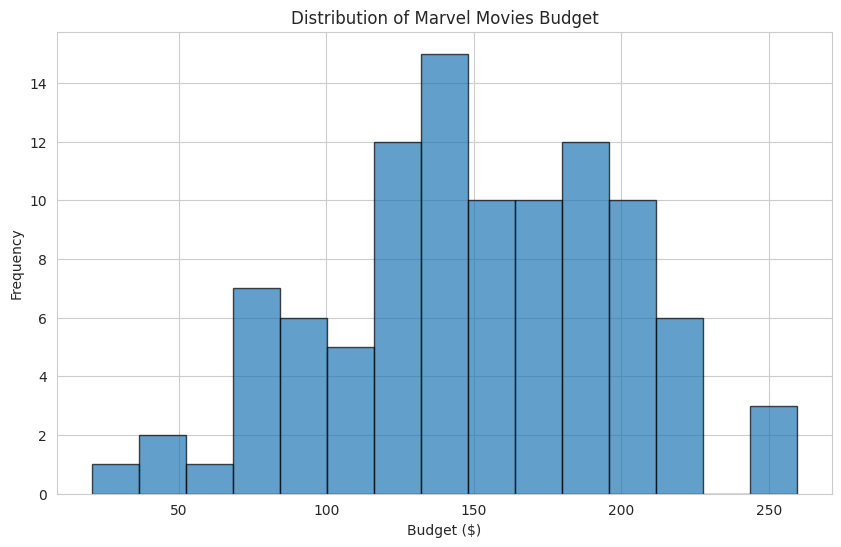

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Add this magic command
%matplotlib inline

# --- Your existing code ---
# Create some sample data for the example
data = {'Budget_numeric': np.random.normal(150, 50, 100)}
df2 = pd.DataFrame(data)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df2['Budget_numeric'].dropna(), bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Budget ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Marvel Movies Budget')
plt.show() # This will now work correctly in the notebook

### 4 - Using a Pearson correlation on the Marvel dataset, identify the variables with the highest positive correlation.

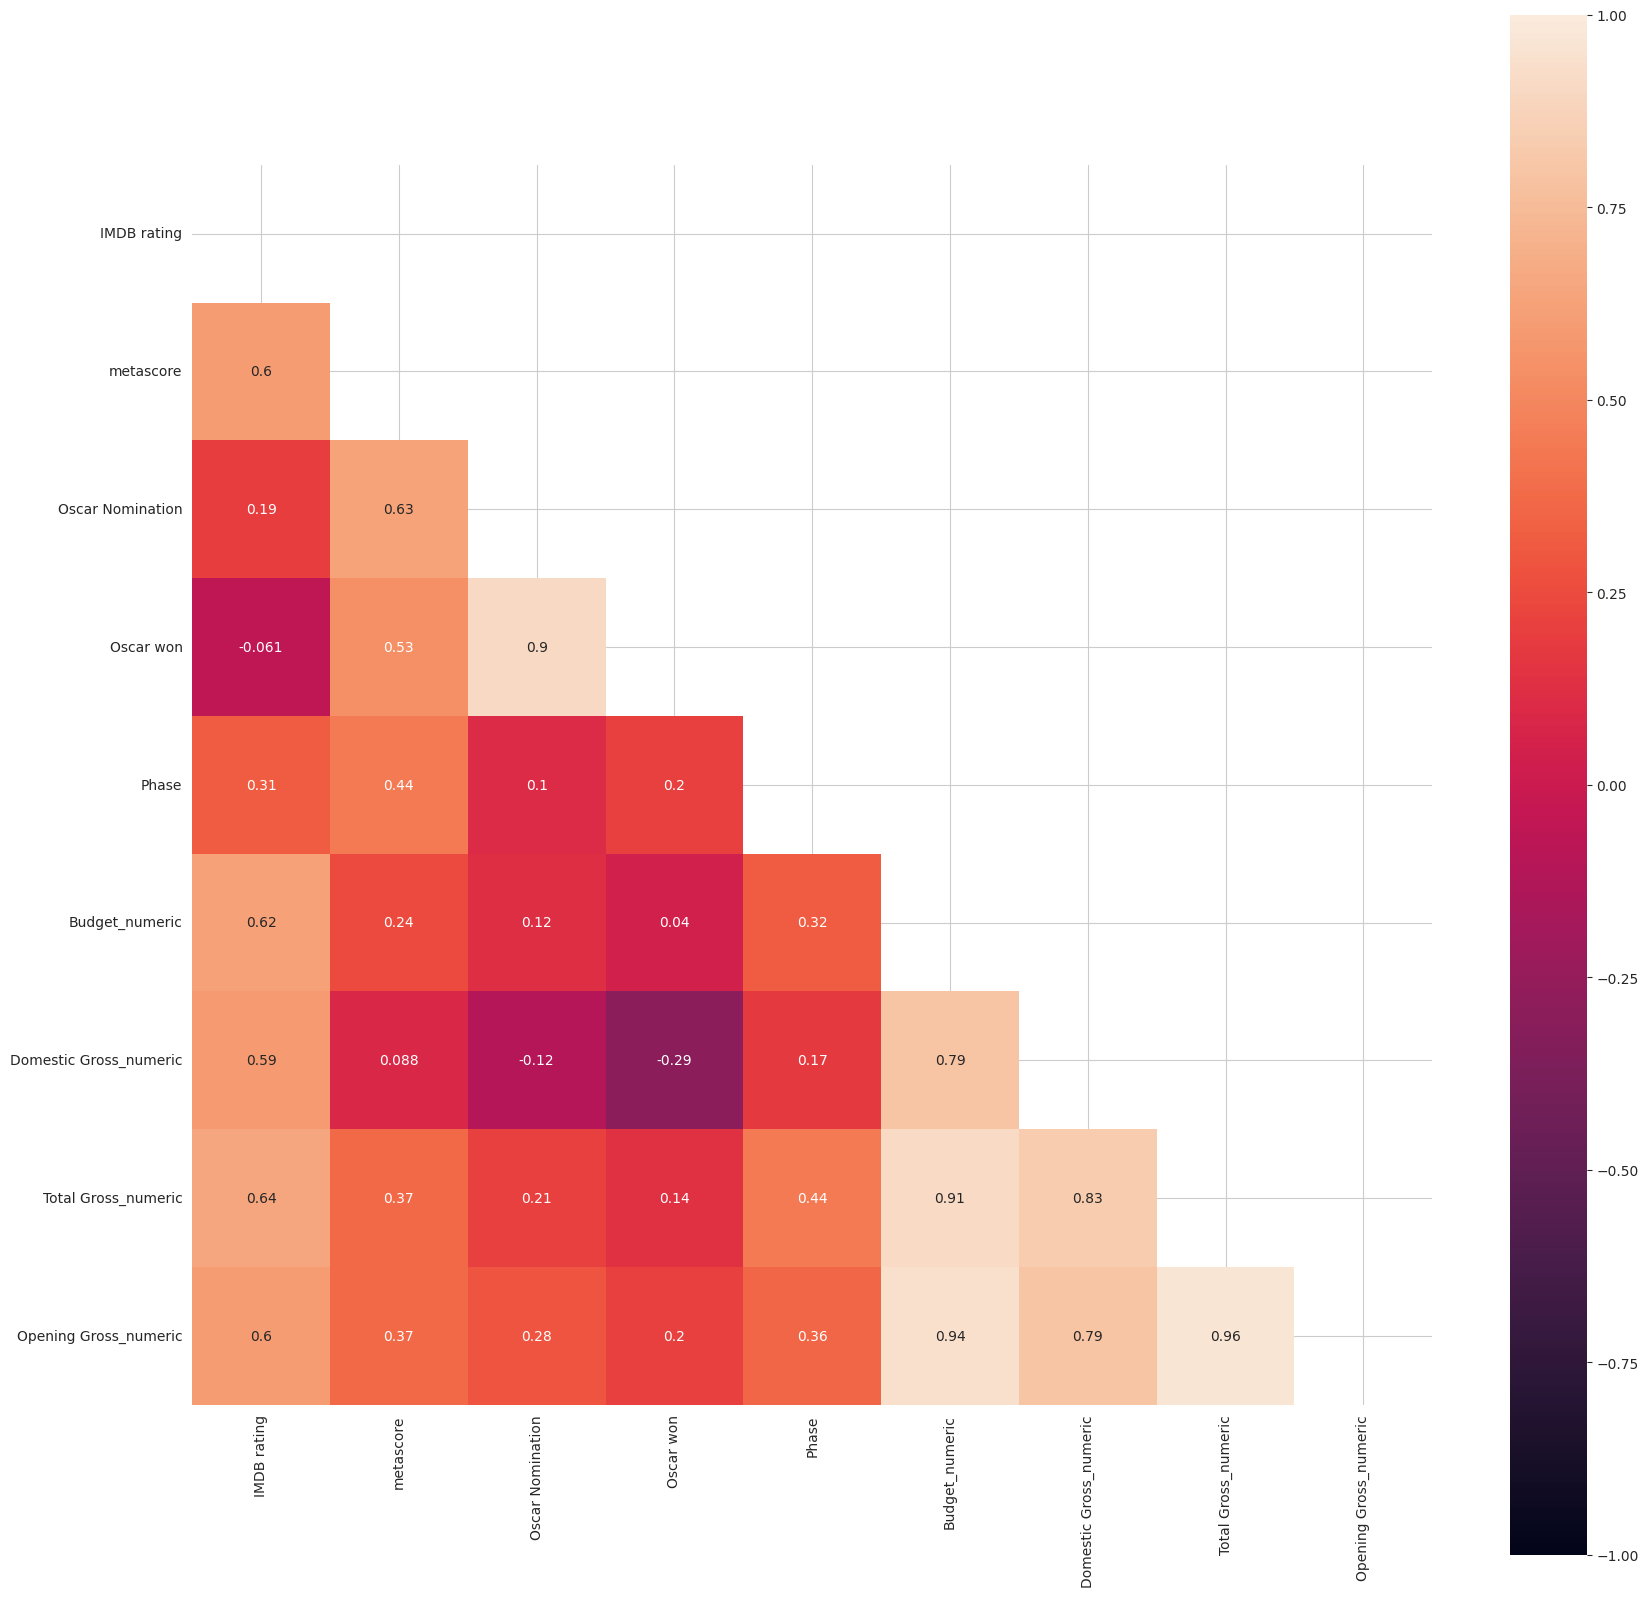


=== TOP 10 CORRELAÇÕES POSITIVAS ===

Total Gross_numeric     Opening Gross_numeric     0.963545
Budget_numeric          Opening Gross_numeric     0.939980
                        Total Gross_numeric       0.908960
Oscar Nomination        Oscar won                 0.899022
Domestic Gross_numeric  Total Gross_numeric       0.830271
                        Opening Gross_numeric     0.793813
Budget_numeric          Domestic Gross_numeric    0.790911
IMDB rating             Total Gross_numeric       0.643687
metascore               Oscar Nomination          0.632156
IMDB rating             Budget_numeric            0.621937
dtype: float64


MAIOR CORRELAÇÃO POSITIVA:
Variáveis: Total Gross_numeric e Opening Gross_numeric
Coeficiente de Pearson: 0.9635


In [83]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Create upper triangle mask for correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set matplotlib to use a standard font
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, mask=mask, square=True, annot=True, vmin=-1, vmax=1)
plt.show()

# Find the highest positive correlations (excluding diagonal)
# Get upper triangle of correlation matrix (excluding diagonal)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Stack the matrix and sort by correlation value
correlations = upper_triangle.stack().sort_values(ascending=False)

print("\n=== TOP 10 CORRELAÇÕES POSITIVAS ===\n")
print(correlations.head(10))
print("\n" + "="*50)
print(f"\nMAIOR CORRELAÇÃO POSITIVA:")
print(f"Variáveis: {correlations.index[0][0]} e {correlations.index[0][1]}")
print(f"Coeficiente de Pearson: {correlations.iloc[0]:.4f}")

In [ ]:
+----------------------------------------------------+
|            Correlation Matrix: Key Insights        |
+----------------------------------------------------+

* Strong Positive Correlation in Financials:
- Budget, Domestic Gross, and Total Gross are highly correlated.
- `Total Gross` and `Opening Gross` have an almost perfect correlation (0.96),
suggesting a strong opening weekend is key to overall success.

* Moderate Agreement between Critics and Audience:
- `IMDB rating` and `metascore` have a moderate positive correlation (0.6).
- This shows that critics and the general audience tend to agree, but not always.

* "Oscar Effect" is Weak or Negative:
- `Oscar won` shows a weak negative correlation with `Domestic Gross` (-0.29).
- It has virtually no correlation with `IMDB rating` (-0.061).
- Conclusion: In this dataset, winning an Oscar does not imply higher
grosses or better audience scores.

### 5 - Go to the Brazilian Open Data Portal and download the CSV file "Relação de Empreendimentos de Geração" (https://dados.gov.br/dataset/relacao-de-empreendimentos-de-geracao). State the license assigned to this data.

### 6 - Import only the first 500 rows of the downloaded CSV file. Note that since this file is from Brazil, you will need to use the encoding='iso-8859-1' parameter in the Pandas read_csv function.

### 7 - From the "Empreendimentos de Geração" data, identify the attribute with the most null values and remove it.

### 8 - From the "Empreendimentos de Geração" data, identify the attribute with the fewest null values and remove the rows where this attribute is null.

### 9 - From the "Empreendimentos de Geração" data, create a new column named "mdaPotenciaOutorgadaMW" based on the "mdaPotenciaOutorgadakW" column. Note that the new column is in Megawatts and the original is in Kilowatts.

### 10 - From the "Empreendimentos de Geração" data, in the "datOperação" column, keep only the date, removing the time information from the values.

### 11 - From the "Empreendimentos de Geração" data, create a new column based on "sigTipoGeracao" where the categorical (qualitative) values are replaced with numerical ones.